# Dataset

[Synthetic Financial Datasets For Fraud Detection](https://www.kaggle.com/datasets/ealaxi/paysim1)

# Setup

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix

# Preprocess

In [23]:
data_cols = ['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']
colmap = {v:i for i,v in enumerate(data_cols)}

In [24]:
def preprocess(X):
    l = X.shape[0]
    enc_xtntype = OrdinalEncoder()
    enc_acc = OrdinalEncoder()

    enc_xtntype.fit(X[:,colmap["type"]].reshape(-1,1))

    arr = np.concatenate((X[:,colmap["nameOrig"]],X[:,colmap["nameDest"]]))
    enc_acc.fit(arr.reshape(-1,1))

    arr_xtntype = enc_xtntype.transform(X[:,colmap["type"]].reshape(-1,1))
    arr_nameOrig = enc_acc.transform(X[:,colmap["nameOrig"]].reshape(-1,1))
    arr_nameDest = enc_acc.transform(X[:,colmap["nameDest"]].reshape(-1,1))

    X[:,0:1] = arr_xtntype.reshape(l,1)
    X[:,2:3] = arr_nameOrig.reshape(l,1)
    X[:,5:6] = arr_nameDest.reshape(l,1)

    return X

# Train

In [36]:
def train(X_train, X_test, y_train, y_test):    
    clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(acc)
    return clf

# Main

In [27]:
df = pd.read_csv("./data/PS_20174392719_1491204439457_log.csv")
X = df[data_cols].to_numpy()
y = df['isFraud'].to_numpy()

In [34]:
X1 = preprocess(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [37]:
clf = train(X_train, X_test, y_train, y_test)

0.9993801295692655


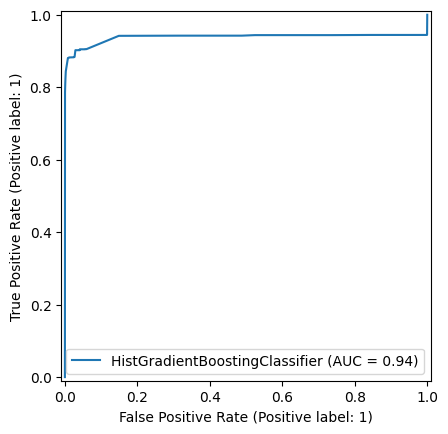

In [39]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

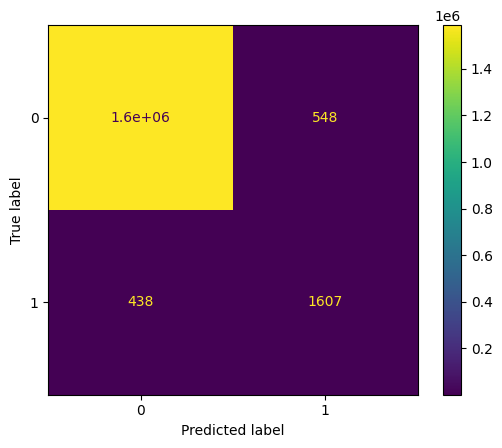

In [42]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()